In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import ee
import geemap
# 导入相关库
import numpy as np
import matplotlib.pyplot as plt
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [21]:
samples = ee.FeatureCollection('users/311605001111/wuhan_new2020_awei0_noseason')
print('sample number:{}'.format(samples.size().getInfo()))

# 水体的样本点数
samplepoint_water = samples.filter(ee.Filter.eq('waterclass',1))
print('water sample number:{}'.format(samplepoint_water.size().getInfo()))

# 非水体的样本点数
samplepoint_land = samples.filter(ee.Filter.eq('waterclass',0))
print('nowater sample number:{}'.format(samplepoint_land.size().getInfo()))

sample number:4236
water sample number:648
nowater sample number:3588


# 绘制折线图

In [36]:
water = samplepoint_water.randomColumn(seed=1).filter(ee.Filter.lt('random', 0.04))
print(water.size().getInfo())

16


Text(0.5, 1.0, 'the spectral curve of water body')

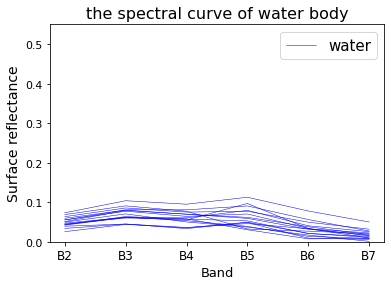

In [37]:
# 水体的光谱曲线特征
water_B2 = ee.List(water.aggregate_array('B2')).getInfo()
water_B3 = ee.List(water.aggregate_array('B3')).getInfo()
water_B4 = ee.List(water.aggregate_array('B4')).getInfo()
water_B5 = ee.List(water.aggregate_array('B5')).getInfo()
water_B6 = ee.List(water.aggregate_array('B6')).getInfo()
water_B7 = ee.List(water.aggregate_array('B7')).getInfo()

x = [1,2,3,4,5,6]
for i in range(water.size().getInfo()):
    a = []
    a.extend((water_B2[i]/10000,water_B3[i]/10000,water_B4[i]/10000,water_B5[i]/10000,water_B6[i]/10000,water_B7[i]/10000))
    plt.plot(x,a,'b-',linewidth=0.5)
plt.xticks(ticks=[1,2,3,4,5,6],labels=['B2','B3','B4','B5','B6','B7'],fontsize=12)
plt.yticks(fontsize=11)
plt.ylim(0,0.55)
plt.legend(['water'],prop={'size':15})
plt.xlabel('Band',fontsize=13)
plt.ylabel("Surface reflectance",fontsize=14)
plt.title("the spectral curve of water body",fontsize=16) 
# plt.title("the spectral curve of water in filter sample",fontdict = {'fontsize':10}) 

In [38]:
samples = ee.FeatureCollection('users/311605001111/wuhan_new2020_awei0_season')
print('sample number:{}'.format(samples.size().getInfo()))

# 水体的样本点数
samplepoint_water = samples.filter(ee.Filter.eq('waterclass',1))
print('water sample number:{}'.format(samplepoint_water.size().getInfo()))

# 非水体的样本点数
samplepoint_land = samples.filter(ee.Filter.eq('waterclass',0))
print('nowater sample number:{}'.format(samplepoint_land.size().getInfo()))

sample number:716
water sample number:436
nowater sample number:280


In [41]:
land_random = samplepoint_water.randomColumn(seed=1).filter(ee.Filter.lt('random', 0.05))
print(land_random.size().getInfo())

24


Text(0.5, 1.0, 'the spectral curve of water body')

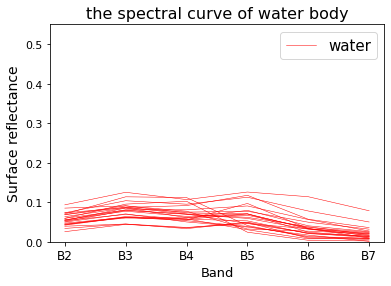

In [42]:
# 过滤掉的样本点中陆地的光谱曲线特征
land_B2 = ee.List(land_random.aggregate_array('B2')).getInfo()
land_B3 = ee.List(land_random.aggregate_array('B3')).getInfo()
land_B4 = ee.List(land_random.aggregate_array('B4')).getInfo()
land_B5 = ee.List(land_random.aggregate_array('B5')).getInfo()
land_B6 = ee.List(land_random.aggregate_array('B6')).getInfo()
land_B7 = ee.List(land_random.aggregate_array('B7')).getInfo()

x = [1,2,3,4,5,6]
for i in range(land_random.size().getInfo()):
    a = []
    a.extend((land_B2[i]/10000,land_B3[i]/10000,land_B4[i]/10000,land_B5[i]/10000,land_B6[i]/10000,land_B7[i]/10000))
    plt.plot(x,a,'r-',linewidth=0.5)
plt.xticks(ticks=[1,2,3,4,5,6],labels=['B2','B3','B4','B5','B6','B7'],fontsize=12)
plt.yticks(fontsize=11)
plt.ylim(0,0.55)
plt.legend(['water'],prop={'size':15})
plt.xlabel('Band',fontsize=13)
plt.ylabel("Surface reflectance",fontsize=14)
plt.title("the spectral curve of water body",fontsize=16) 

In [ ]:
number = ee.Algorithms.If(ee.Number(land_random.size()).gt(ee.Number(water.size())),ee.Number(water.size()),ee.Number(land_random.size()))
print(number.getInfo())  

water_B2 = ee.List(water.aggregate_array('B2')).getInfo()
water_B3 = ee.List(water.aggregate_array('B3')).getInfo()
water_B4 = ee.List(water.aggregate_array('B4')).getInfo()
water_B5 = ee.List(water.aggregate_array('B5')).getInfo()
water_B6 = ee.List(water.aggregate_array('B6')).getInfo()
water_B7 = ee.List(water.aggregate_array('B7')).getInfo()

land_B2 = ee.List(land_random.aggregate_array('B2')).getInfo()
land_B3 = ee.List(land_random.aggregate_array('B3')).getInfo()
land_B4 = ee.List(land_random.aggregate_array('B4')).getInfo()
land_B5 = ee.List(land_random.aggregate_array('B5')).getInfo()
land_B6 = ee.List(land_random.aggregate_array('B6')).getInfo()
land_B7 = ee.List(land_random.aggregate_array('B7')).getInfo()

x = [1,2,3,4,5,6]
for i in range(number.getInfo()):
    a = []
    a.extend((water_B2[i]/10000,water_B3[i]/10000,water_B4[i]/10000,water_B5[i]/10000,water_B6[i]/10000,water_B7[i]/10000))
    b = []
    b.extend((land_B2[i]/10000,land_B3[i]/10000,land_B4[i]/10000,land_B5[i]/10000,land_B6[i]/10000,land_B7[i]/10000))    
    plt.plot(x,a,'b-',linewidth=0.5)
    plt.plot(x,b,'r-',linewidth=0.5)
plt.xticks(ticks=[1,2,3,4,5,6],labels=['B2','B3','B4','B5','B6','B7'],fontsize=12)
plt.yticks(fontsize=11)
plt.ylim(0,0.55)
plt.legend(['filter water','filter land'],prop={'size':15})
plt.xlabel('Band',fontsize=13)
plt.ylabel("Surface reflectance",fontsize=14)
plt.title("the spectral curve of land and water in filter sample",fontsize=14.5)